# Import Required Libraries

In [ ]:
!pip install -q python-terrier
!pip install transformers
!pip install --upgrade tensorflow tensorflow-hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 945.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import pyterrier as pt
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from gensim.utils import simple_preprocess
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import svm
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import os
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import torch
from transformers import AlbertTokenizer, AlbertForSequenceClassification
import tensorflow as tf
import tensorflow_hub as hub
import string

from sklearn.model_selection import train_test_split
from transformers import AlbertTokenizer, TFDistilBertModel
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from transformers import AlbertTokenizer, TFAlbertModel
from sklearn.preprocessing import LabelEncoder
from transformers import AlbertTokenizer, TFAutoModel
from transformers import AlbertTokenizerFast

# Load Data

In [ ]:
# Mount the google drive
drive.mount('/content/drive')
# load the dataset
datasetPath = '/content/drive/MyDrive/NLP/EDOS.csv'
df = pd.read_csv(datasetPath)

In [ ]:
labels = df['eb+_emot'].unique()
pd.set_option('display.max_colwidth', 150)
df.head(5)

# **Priminary Analysis**



## Tokenization, Lemmatization, Removing stopwords and punctuations

In [ ]:
# Load the wordnet
nltk.download('wordnet')
# Load the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Make the list of stopwords
stopwords_list = stopwords.words('english')
extra_stopword = [
    'got','get','mine','us','unless','although','though','yet','unless','since',"'s","'m","'re","'ve","'ll","'d",
    '.','!',',','...','take','"',"'",'gonna',"'t",'go','going','like','know','?'
]
stopwords_list.extend(extra_stopword)

In [ ]:
def custom_tokenizer(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)

    # Remove numbers
    text = re.sub(r"\d+", "", text)


    # Split the text into tokens
    tokens = text.split()

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords_list]
    return tokens

In [ ]:
df['uttr_tokens'] = df['uttr'].apply(lambda x: custom_tokenizer(x))
df['uttr_length'] = df['uttr_tokens'].apply(len)

## A Sample Dialogue

In [ ]:
print('an example :')
dialogue_id = 1159
filtered_df = df[df['dialogue_id'] == dialogue_id]
print(filtered_df.to_string(index=False, justify='center'))

an example :
 dialogue_id  turn                                     uttr                                        eb+_emot    label_confidence             uttr_tokens               uttr_length
    1159       1                                                    Could you please hurry up ?    suggesting      0.693129                   [could, please, hurry]      3      
    1159       2   I 'm doing my best , miss . I have a feeling Elena will be here any minute .       hopeful      0.478700     [best, miss, feeling, elena, minute]      5      
    1159       3                                                                      Let her !   encouraging      0.510545                                    [let]      1      
    1159       4                                              We 're not doing anything wrong .       content      0.467352                        [anything, wrong]      2      
    1159       5                                                             Done ! Wonderful ! a

## Number of Dialogues, Utterance, and Labels

In [ ]:
print('number of dialogue : {}'.format(df['dialogue_id'].nunique()))
print('number of utterance : {}'.format(len(df)))
print('There are {} labels:\n {}'.format(len((labels)), "\n ".join(str(label) for label in labels)))

number of dialogue : 1000000
number of utterance : 2829426
There are 41 labels:
 angry
 furious
 prepared
 acknowledging
 trusting
 confident
 hopeful
 caring
 sentimental
 anticipating
 wishing
 surprised
 ashamed
 questioning
 sad
 nostalgic
 devastated
 terrified
 embarrassed
 lonely
 encouraging
 suggesting
 content
 afraid
 impressed
 agreeing
 apprehensive
 proud
 annoyed
 anxious
 grateful
 excited
 neutral
 faithful
 guilty
 consoling
 disgusted
 disappointed
 jealous
 joyful
 sympathizing


## Statistics


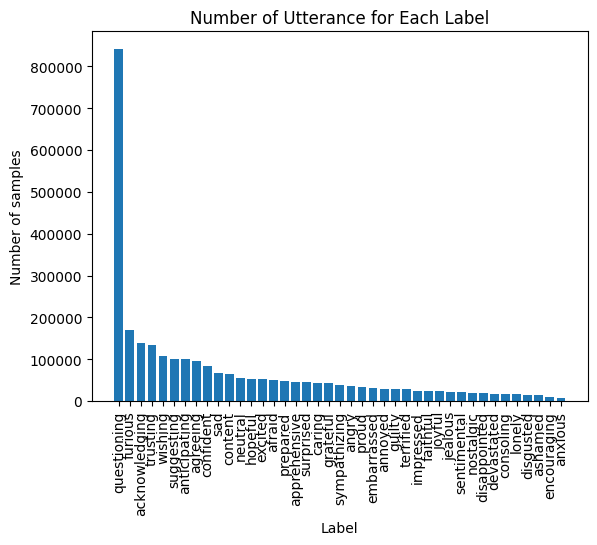

In [ ]:
# Number of Utterance for each label
labels_count = df['eb+_emot'].value_counts()
plt.bar(labels_count.index, labels_count.values)
plt.xticks(rotation=90)
plt.xlabel('Label')
plt.ylabel('Number of samples')
plt.title('Number of Utterance for Each Label')
plt.show()

In a Dialogue:
maximum number of uttrance: 14
minimum number of uttrance: 2


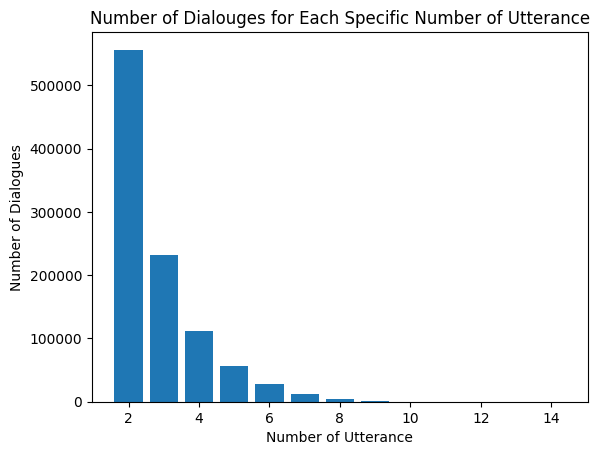

In [ ]:
# Number of Utterance in Dialogues
dialogue_len = df['dialogue_id'].value_counts()
print('In a Dialogue:')
print('maximum number of uttrance: {}'.format(dialogue_len.max()))
print('minimum number of uttrance: {}'.format(dialogue_len.min()))

dialogue_len_count = dialogue_len.value_counts()
plt.bar(dialogue_len_count.index, dialogue_len_count.values)

plt.xlabel('Number of Utterance')
plt.ylabel('Number of Dialogues')
plt.title('Number of Dialouges for Each Specific Number of Utterance')
plt.show()

In [ ]:
# Average Document Length
print("Average Utterance length: {}".format(df['uttr_length'].mean()))
print("Max Utterance length: {}".format(df['uttr_length'].max()))
print("Min Utterance length: {}".format(df['uttr_length'].min()))
print("Median Utterance length: {}".format(df['uttr_length'].median()))

Average Utterance length: 4.6471319624545755
Max Utterance length: 57
Min Utterance length: 0
Median Utterance length: 3.0


In [ ]:
# Average Vocabulary Size
df['vocabulary_size'] = df['uttr_tokens'].apply(lambda x: len(set(x)))
average_vocabulary_size = df['vocabulary_size'].mean()
print("Average Vocabulary Size: {}".format(average_vocabulary_size))

Average Vocabulary Size: 4.475232432302524


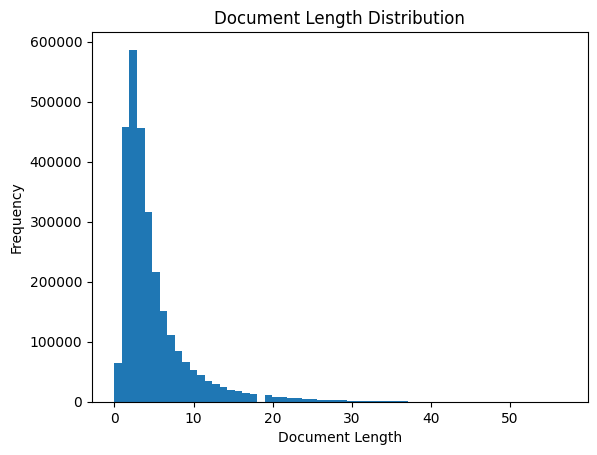

In [ ]:
# Document Length Distribution
plt.hist(df['uttr_length'], bins=60)
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.title('Document Length Distribution')
plt.show()

## WordCloud

In [ ]:
# Make the word cloud for each label
def generate_wordcloud(label):
  tokens = sum(df[df['eb+_emot']==label]['uttr_tokens'], [])
  counter = Counter(tokens)
  most_common = counter.most_common()
  word_frequencies = {}
  for word, frequency in most_common:
    word_frequencies[word] = frequency
  wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_frequencies)
  return wordcloud

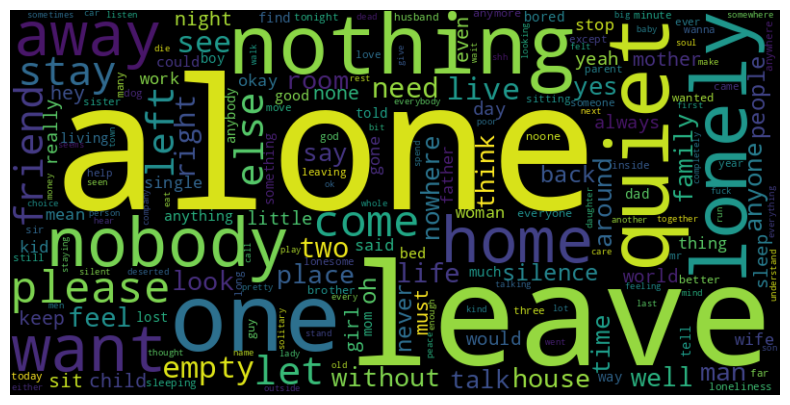

In [ ]:
wordcloud_angry = generate_wordcloud('lonely')
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_angry, interpolation='bilinear')
plt.axis("off")
plt.show()

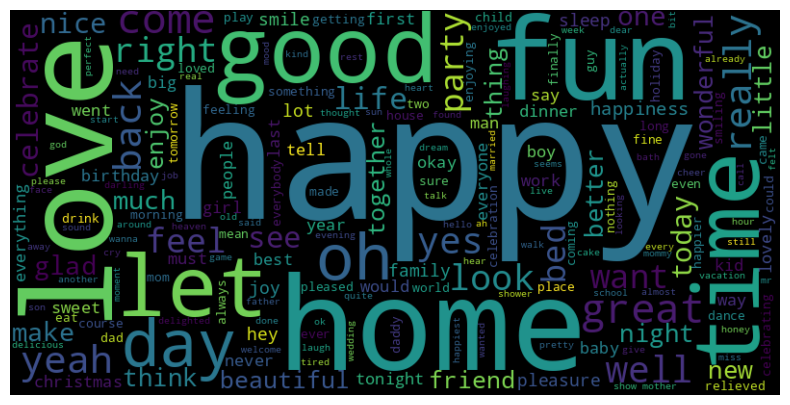

In [ ]:
wordcloud_angry = generate_wordcloud('joyful')
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_angry, interpolation='bilinear')
plt.axis("off")
plt.show()

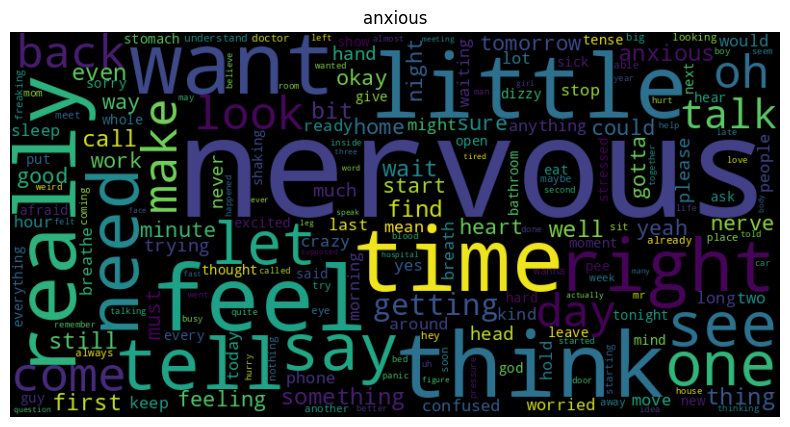

In [ ]:
wordcloud_angry = generate_wordcloud('anxious')
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_angry, interpolation='bilinear')
plt.axis("off")
plt.title('anxious')
plt.show()

## Indexing Documents(Dialouges) for Keyword Search

In [ ]:
%cd /content/drive/MyDrive/NLP

/content/drive/MyDrive/NLP


In [ ]:
# !rm -rf index_dial

In [ ]:
# Making a balanced smaller dataset
selected_df = df.groupby('eb+_emot').apply(lambda x: x.sample(n=500, random_state=42)).reset_index(drop=True)

In [ ]:
#Initialize the Terrier
if not pt.started():
  pt.init()

terrier-assemblies 5.7 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.7 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7



In [ ]:
#indexing the documents
indexer = pt.DFIndexer("./index_uttr", overwrite=True)
selected_df['docno'] = selected_df.index.astype(str)
index_ref = indexer.index(selected_df["uttr"], selected_df['docno'])

/usr/local/lib/python3.10/dist-packages/pyterrier/index.py:628: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in meta_column[1].iteritems():


11:45:15.753 [main] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (53) - further warnings are suppressed
11:45:35.757 [main] WARN org.terrier.structures.indexing.Indexer - Indexed 208 empty documents


In [ ]:
# load the index
index = pt.IndexFactory.of(index_ref)

In [ ]:
# Collection Statistics
print(index.getCollectionStatistics().toString())

Number of documents: 20500
Number of terms: 14159
Number of postings: 119933
Number of fields: 0
Number of tokens: 125742
Field names: []
Positions:   false



In [ ]:
# Looking up a term
index.getLexicon()["walk"].toString()

'term585 Nt=103 TF=107 maxTF=2 @{0 213749 7}'

In [ ]:
# search an index
query = 'I hate you, bitch'
br = pt.BatchRetrieve(index, wmodel="BM25")
results = br.search(query)
docno = results["docno"].iloc[0:5]
selected_df.iloc[(docno)]

,dialogue_id,turn,uttr,eb+_emot,label_confidence,uttr_tokens,uttr_length,vocabulary_size,docno
1791,3748864,2,"I said "" bitch Bitch ... bitch ... bitch",angry,0.568931,"[said, bitch, bitch, bitch, bitch]",5,2,1791
1678,5403451,2,This hate is not good . I just hate him,angry,0.721932,"[hate, good, hate]",3,2,1678
1514,2134768,2,This bitch is stubborn .,angry,0.545585,"[bitch, stubborn]",2,2,1514
1664,2360743,1,Motherfucking bitch !,angry,0.559951,"[motherfucking, bitch]",2,2,1664
1830,8224148,4,Treacherous bitch !,angry,0.637634,"[treacherous, bitch]",2,2,1830


## KMean Clustering(tf-idf)

In [ ]:
# Making a balanced smaller dataset
selected_df = df.groupby('eb+_emot').apply(lambda x: x.sample(n=500, random_state=42)).reset_index(drop=True)

In [ ]:
# Create an instance of TfidfVectorizer with the custom tokenizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(selected_df['uttr'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# perfoming randomized PCA to reduce dimensionality
rpca = PCA(n_components=2, svd_solver='randomized')
X_pca = rpca.fit_transform(X.toarray())

In [ ]:
# Deviding data into k cluster
k=10
kmeans = KMeans(n_clusters=k, random_state=42,n_init=10,verbose=0)
kmeans.fit(X)
selected_df['cluster'] = kmeans.labels_

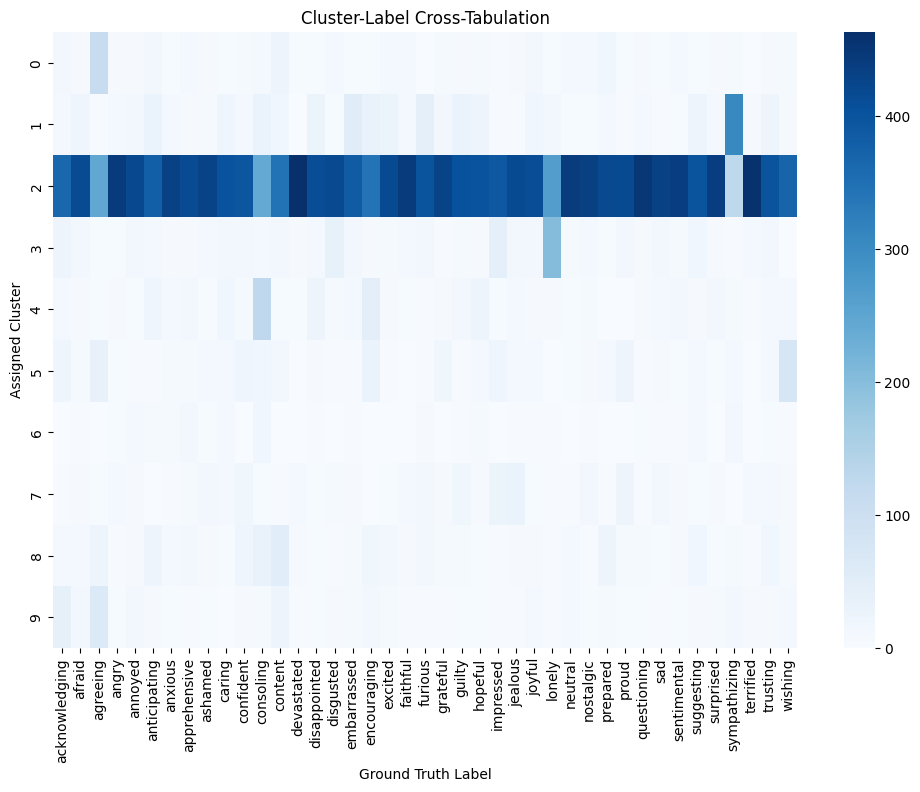

In [ ]:
cross_tab = pd.crosstab(selected_df['cluster'], selected_df['eb+_emot'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='Blues')
plt.title('Cluster-Label Cross-Tabulation')
plt.xlabel('Ground Truth Label')
plt.ylabel('Assigned Cluster')
plt.show()

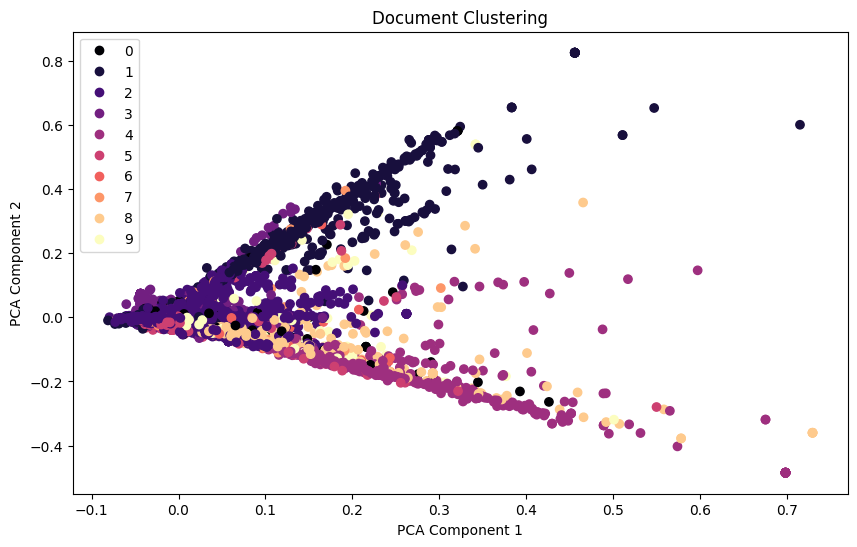

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=selected_df['cluster'], cmap='magma')
plt.legend(handles=scatter.legend_elements()[0], labels=range(41))
plt.title('Document Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Word2Vec

In [ ]:
%cd /content/drive/MyDrive/NLP

/content/drive/MyDrive/NLP


In [ ]:
# Check if saved model exists
if os.path.isfile('word2vec_model.bin'):
    model = Word2Vec.load("word2vec_model.bin")
else:
  # Train the Word2Vec model
  model = Word2Vec(df['uttr_tokens'], min_count=5, vector_size=100, workers=4)
  # Save the Word2Vec model
  model.save("word2vec_model.bin")

In [ ]:
# Explore the properties of the Word2Vec embedding
# Get the most similar words to a given word
word = 'happy'
similar_words = model.wv.most_similar(word)

print(f"The most similar words to '{word}':")
for similar_word, similarity in similar_words:
    print(f"- {similar_word}: {similarity}")

The most similar words to 'happy':
- sad: 0.6499484181404114
- happier: 0.6417496800422668
- unhappy: 0.6322616338729858
- ending: 0.5509464144706726
- happiest: 0.549723207950592
- envy: 0.5397444367408752
- happiness: 0.527628481388092
- wishing: 0.5252036452293396
- thanksgiving: 0.524858832359314
- glad: 0.5246225595474243


In [ ]:
# Find the word that completes the analogy "king - man + woman = ?"
analogy_result = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
# Print the result
print(f"Result of the analogy 'king - man + woman': {analogy_result[0][0]}")

Result of the analogy 'king - man + woman': queen


## KMean Clustering(Word2Vec)

In [ ]:
confident_df = df[df['label_confidence']>0.5]
# Making a balanced smaller dataset
selected_df = confident_df.groupby('eb+_emot').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)

In [ ]:
# Vectorize sentences with word2Vec
sentence_vectors = []
# Create a list to store the rows that satisfy the condition
selected_rows = []

# Iterate over each sentence and row in the selected_df
for sentence, row in zip(selected_df['uttr_tokens'], selected_df.iterrows()):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if vectors:
        sentence_vector = sum(vectors) / len(vectors)
        sentence_vectors.append(sentence_vector)
        selected_rows.append(row[1])  # Append the entire row to selected_rows list

# Create a dataframe from selected_rows list
selected_rows_df = pd.DataFrame(selected_rows)

### k = 41

In [ ]:
# Deviding data into k cluster
k=41
kmeans = KMeans(n_clusters=k, random_state=42,n_init=10,verbose=0)
kmeans.fit(sentence_vectors)
selected_rows_df['cluster'] = kmeans.labels_

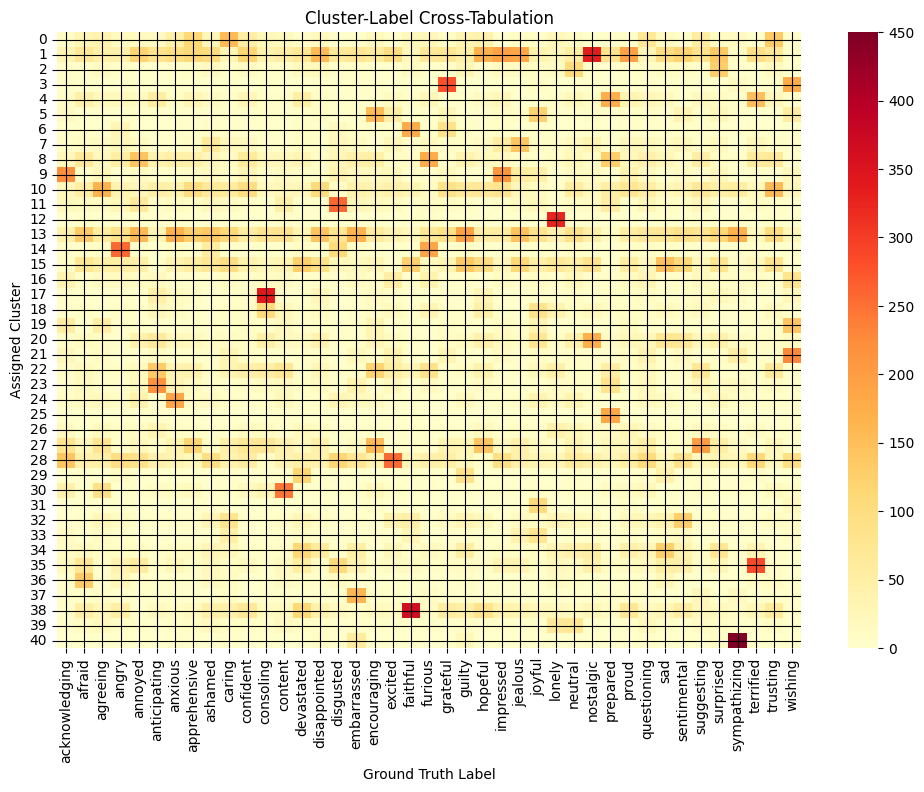

In [ ]:
cross_tab = pd.crosstab(selected_rows_df['cluster'], selected_rows_df['eb+_emot'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='YlOrRd')
plt.title('Cluster-Label Cross-Tabulation')
plt.xlabel('Ground Truth Label')
plt.ylabel('Assigned Cluster')
plt.grid(True, which='both', color='black')

plt.show()

### k = 10

In [ ]:
# Deviding data into k cluster
k=10
kmeans = KMeans(n_clusters=k, random_state=42,n_init=10,verbose=0)
kmeans.fit(sentence_vectors)
selected_rows_df['cluster'] = kmeans.labels_

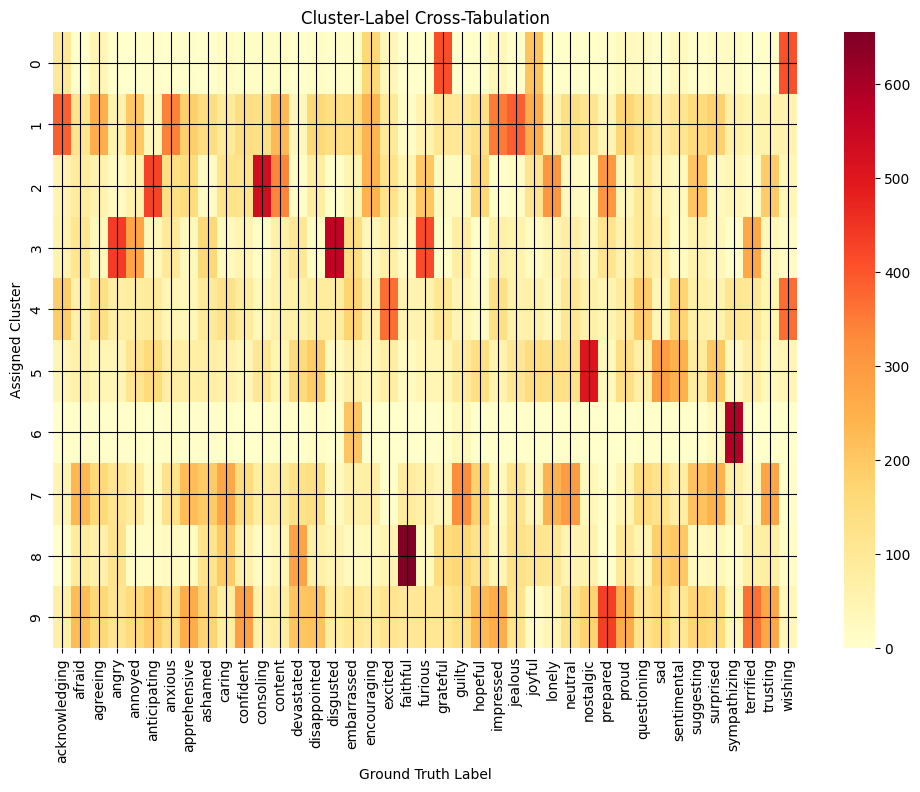

In [ ]:
cross_tab = pd.crosstab(selected_rows_df['cluster'], selected_rows_df['eb+_emot'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='YlOrRd')
plt.title('Cluster-Label Cross-Tabulation')
plt.xlabel('Ground Truth Label')
plt.ylabel('Assigned Cluster')
plt.grid(True, which='both', color='black')

plt.show()

# **Trianing**

## SVM

In [ ]:
%cd /content/drive/MyDrive/NLP

/content/drive/MyDrive/NLP


### Count Vectorizer

In [ ]:
confident_df = df[df['label_confidence']>0.5]
# Making a balanced smaller dataset
selected_df = confident_df.groupby('eb+_emot').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)

In [ ]:
# Split the data into training and testing sets
X = selected_df['uttr']
y = selected_df['eb+_emot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text preprocessing using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
## Model Building

# Check if saved model exists
if not os.path.isfile('svm_countvec.pkl'):
    classifier = joblib.load('svm_countvec.pkl')
else:
    # Initialize the SVM classifier
    classifier = svm.SVC()
    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)
    # Save the SVM model
    joblib.dump(classifier, 'svm_countvec.pkl')

In [ ]:
# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4004878048780488


In [ ]:
# Example: Predict sentiment for a new input
new_input = ['Don\'t mention it, Mr. Parker. It\'s just too bad we couldn\'t have stopped that ten-gallon grease ball from stealing our ranch.']
new_input_vectorized = vectorizer.transform(new_input)
predicted_sentiment = classifier.predict(new_input_vectorized )
print(f"Predicted sentiment: {predicted_sentiment}")

Predicted sentiment: ['disappointed']


### TF-IDF Vectorizer

In [ ]:
confident_df = df[df['label_confidence']>0.5]
# Making a balanced smaller dataset
selected_df = confident_df.groupby('eb+_emot').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)

In [ ]:
# Split the data into training and testing sets
X = selected_df['uttr']
y = selected_df['eb+_emot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train.astype(str))

In [ ]:
## Model Building

# Check if saved model exists
if os.path.isfile('svm_tfidf.pkl'):
    classifier = joblib.load('svm_tfidf.pkl')
else:
    # Initialize the SVM classifier
    classifier = svm.SVC()
    # Train the classifier
    classifier.fit(X_train_tfidf, y_train)
    # Save the SVM model
    joblib.dump(classifier, 'svm_tfidf.pkl')

In [ ]:
## Test

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test.astype(str))

# Make predictions on the test set
predictions = classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.49365853658536585


In [ ]:
# Example: Predict sentiment for a new input
new_input = ['Don\'t mention it, Mr. Parker. It\'s just too bad we couldn\'t have stopped that ten-gallon grease ball from stealing our ranch.']
new_input_tfidf = vectorizer.transform(new_input)
predicted_sentiment = classifier.predict(new_input_tfidf)
print(f"Predicted sentiment: {predicted_sentiment}")

Predicted sentiment: ['disappointed']


### Word2Vec

In [ ]:
confident_df = df[df['label_confidence']>0.5]
# Making a balanced smaller dataset
selected_df = confident_df.groupby('eb+_emot').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)

In [ ]:
# Split the data into training and testing sets
X = selected_df['uttr']
y = selected_df['eb+_emot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check if saved model exists
if os.path.isfile('word2vec_model.bin'):
    model = Word2Vec.load("word2vec_model.bin")
else:
  # Train the Word2Vec model
  model = Word2Vec(df['uttr_tokens'], min_count=5, vector_size=100, workers=4)
  # Save the Word2Vec model
  model.save("word2vec_model.bin")

In [ ]:
# Function to convert a sentence to its Word2Vec representation
def get_sentence_vector(sentence):
    vectors = [model.wv[word] for word in sentence.split() if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)  # Return zero vector if no words in the sentence are present in the model

In [ ]:
## Preparing the Data

# Preprocess the text data
sentences = [sentence.split() for sentence in X_train]
# Vectorize the training data
X_train_vec = np.array([get_sentence_vector(sentence) for sentence in X_train])
# Vectorize the test data
X_test_vec = np.array([get_sentence_vector(sentence) for sentence in X_test])

In [ ]:
## Model Building

# Check if saved model exists
if os.path.isfile('svm_word2vec.pkl'):
    classifier = joblib.load('svm_word2vec.pkl')
else:
    # Initialize the SVM classifier
    classifier = svm.SVC()
    # Train the classifier
    classifier.fit(X_train_vec, y_train)
    # Save the SVM model
    joblib.dump(classifier, 'svm_word2vec.pkl')

In [ ]:
# Make predictions on the test set
predictions = classifier.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.35597560975609754


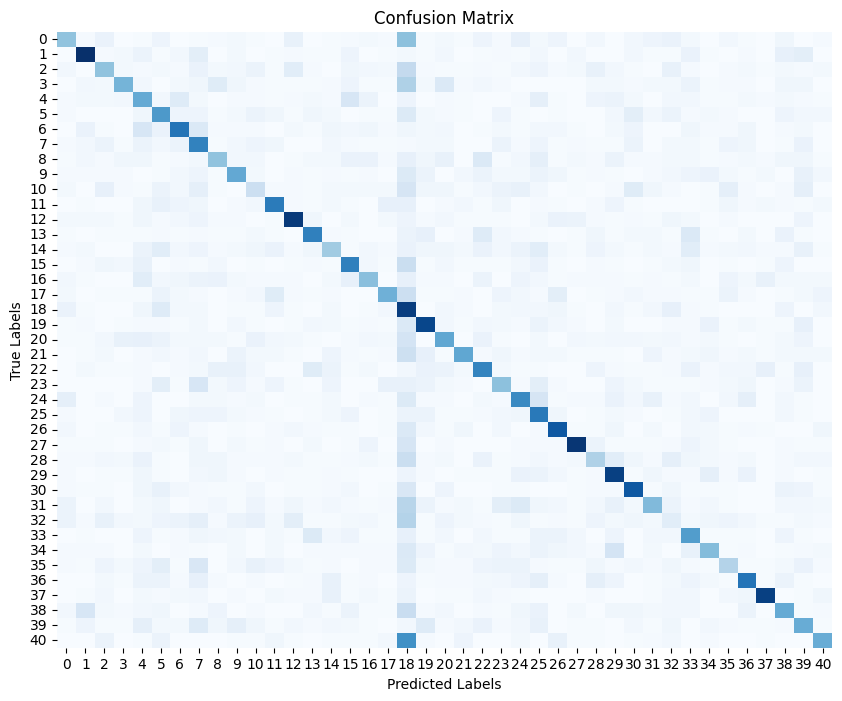

In [ ]:
# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Example: Predict sentiment for a new input
new_input = "Don't mention it, Mr. Parker. It's just too bad we couldn't have stopped that ten-gallon grease ball from stealing our ranch."
new_input_vec = get_sentence_vector(new_input)
predicted_sentiment = classifier.predict([new_input_vec])
print(f"Predicted sentiment: {predicted_sentiment}")

Predicted sentiment: ['guilty']


## ALBERT

In [ ]:
confident_df = df[df['label_confidence']>0.6]
# Making a balanced smaller dataset
selected_df = confident_df.groupby('eb+_emot').apply(lambda x: x.sample(n=4000, random_state=42)).reset_index(drop=True)
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df['label'] = selected_df['eb+_emot']
selected_df['utterance'] = selected_df['uttr']
selected_df = selected_df.drop(['dialogue_id','label_confidence','eb+_emot','turn','uttr'], axis=1)
selected_df.head()

,label,utterance
0,anxious,Why do my hands tremble to knock at the door ... ?
1,confident,"in the corner there . Miss ... Miss ... There 's room here . The flat-chested blonde 's OK . The big one 's not bad either , If you take off her s..."
2,annoyed,"Don 't talk rubbish . Hurry . I have to stop working out , my jeans don 't fit ."
3,confident,I promised I 'd show you how to wrestle .
4,ashamed,No . Because you 're punishable by law . Unacceptable criminal contacts .


In [ ]:
len(selected_df)

164000

In [ ]:
# Enable mixed precision training
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Enable XLA
tf.config.optimizer.set_jit(True)

In [ ]:
# Preprocessing
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove leading/trailing whitespaces
    return text
selected_df['utterance'] = selected_df['utterance'].apply(preprocess_text)

In [ ]:
# Split data into train and test sets
train_df, test_df = train_test_split(selected_df, test_size=0.2, random_state=42)

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['label'])
test_labels = label_encoder.transform(test_df['label'])

In [ ]:
# Load ALBERT tokenizer (fast version)
tokenizer = AlbertTokenizerFast.from_pretrained('albert-base-v2')

# Tokenize
max_length = 100  # Maximum sequence length
train_tokens = tokenizer.batch_encode_plus(
    train_df['utterance'].tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_tensors='tf'
)
test_tokens = tokenizer.batch_encode_plus(
    test_df['utterance'].tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_tensors='tf'
)

In [ ]:
# Convert tokenized input to numpy arrays
train_input_ids = np.array(train_tokens['input_ids'])
train_attention_mask = np.array(train_tokens['attention_mask'])
test_input_ids = np.array(test_tokens['input_ids'])
test_attention_mask = np.array(test_tokens['attention_mask'])

In [ ]:
albert_model = TFAlbertModel.from_pretrained('albert-base-v2')
# Freeze ALBERT layers
for layer in albert_model.layers:
    layer.trainable = False
# Define ALBERT model architecture
input_ids = Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')
albert_output = albert_model({'input_ids': input_ids, 'attention_mask': attention_mask})[0]
pooler_output = albert_output[:, 0, :]  # Extract pooled output
output = Dense(len(label_encoder.classes_), activation='softmax')(pooler_output)
model = Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
learning_rate = 1e-3
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Some layers from the model checkpoint at albert-base-v2 were not used when initializing TFAlbertModel: ['predictions']
- This IS expected if you are initializing TFAlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertModel were initialized from the model checkpoint at albert-base-v2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


In [ ]:
# Train the model
batch_size = 32
epochs = 5
model.fit(
    {'input_ids': train_input_ids, 'attention_mask': train_attention_mask},
    train_labels,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/10
4100/4100 [==============================] - 192s 43ms/step - loss: 2.3044 - accuracy: 0.3618
Epoch 2/10
4100/4100 [==============================] - 180s 44ms/step - loss: 1.9136 - accuracy: 0.4575
Epoch 3/10
1606/4100 [==========>...................] - ETA: 1:49 - loss: 1.8159 - accuracy: 0.4828

In [ ]:
# Evaluate the model on the test set
_, accuracy = model.evaluate(
    {'input_ids': test_input_ids, 'attention_mask': test_attention_mask},
    test_labels,
    batch_size=batch_size
)
print("Test Accuracy:", accuracy)